## Installed required packages

In [1]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
!pip install transformers -q torch sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 37.4 MB/s eta 0:00:00


## Importing Libraries or Packages

In [3]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


##  Loading the pre-processed dataset

In [4]:
df = pd.read_csv('/content/Processed_dataset.csv')

## Performing Generate Embedding Model(all-MiniLM-L6-v2)

In [5]:
embedding_model_name = 'all-MiniLM-L6-v2'
embedding_model = SentenceTransformer(embedding_model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

* The all-MiniLM-L6-v2 is a compact sentence embedding model from the Sentence Transformers library. It uses a 6-layer Transformer architecture to generate dense vector representations of sentences, capturing semantic information effectively. Despite its small size, the model balances speed and accuracy, making it ideal for tasks like semantic search, clustering, and text similarity. This model achieves a good trade-off between performance and computational efficiency, allowing it to be deployed in real-time applications on resource-constrained environments.

### Generate Embedding Function

In [6]:
def generate_embedding(text, embedding_model):
    embedding = embedding_model.encode([text], convert_to_numpy=True)
    return embedding[0]

def process_dataset_with_embeddings(df, embedding_model):
    df['embeddings'] = df['clean_essay'].apply(lambda x: generate_embedding(x, embedding_model))
    df['embeddings'] = df['embeddings'].apply(lambda x: ','.join(map(str, x)))
    return df

In [7]:
df = process_dataset_with_embeddings(df, embedding_model)

In [8]:
## Generated Embeddings
df['embeddings']

0        -0.02942085,-0.008976666,0.028833369,-0.041873...
1        -0.0275625,-0.014471483,0.0057740235,-0.017673...
2        0.0014746368,-0.011871,0.023100575,-0.03276539...
3        -0.00613624,-0.036276743,-0.007253244,-0.03754...
4        -0.041933954,-0.0027036963,-0.019984702,-0.068...
                               ...                        
12971    0.013403864,-0.11702805,0.014795744,0.07596907...
12972    -0.047734536,-0.1139084,0.05125254,0.07518625,...
12973    0.018796187,-0.11628387,0.015407415,0.04768122...
12974    -0.022904221,-0.089778736,0.00537749,-0.039614...
12975    -0.026224118,-0.09451019,-0.0019473579,0.03089...
Name: embeddings, Length: 12976, dtype: object

In [9]:
df

,Unnamed: 0,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count,embeddings
0,0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,1441,344,16,4.188953,11,76,75,18,24,"-0.02942085,-0.008976666,0.028833369,-0.041873..."
1,1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,1765,413,17,4.273608,21,98,84,20,19,"-0.0275625,-0.014471483,0.0057740235,-0.017673..."
2,2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,1185,276,14,4.293478,5,76,51,20,16,"0.0014746368,-0.011871,0.023100575,-0.03276539..."
3,3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,31,142,96,39,29,"-0.00613624,-0.036276743,-0.007253244,-0.03754..."
4,4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,2023,469,30,4.313433,18,110,90,32,36,"-0.041933954,-0.0027036963,-0.019984702,-0.068..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,12971,21626,8,In most stories mothers and daughters are eith...,6,In stories mothers daughters either enemies fr...,3133,810,26,3.867901,13,127,170,51,70,"0.013403864,-0.11702805,0.014795744,0.07596907..."
12972,12972,21628,8,I never understood the meaning laughter is the...,5,I never understood meaning laughter shortest d...,1970,526,31,3.745247,11,106,98,41,56,"-0.047734536,-0.1139084,0.05125254,0.07518625,..."
12973,12973,21629,8,"When you laugh, is out of habit, or is cause? ...",7,When laugh habit cause What causes laughing...,3256,781,40,4.169014,19,148,170,44,59,"0.018796187,-0.11628387,0.015407415,0.04768122..."
12974,12974,21630,8,"Trippin' on fences I am years young, and in th...",7,Trippin fences I years young short years I ...,2185,556,36,3.929856,13,93,109,42,52,"-0.022904221,-0.089778736,0.00537749,-0.039614..."


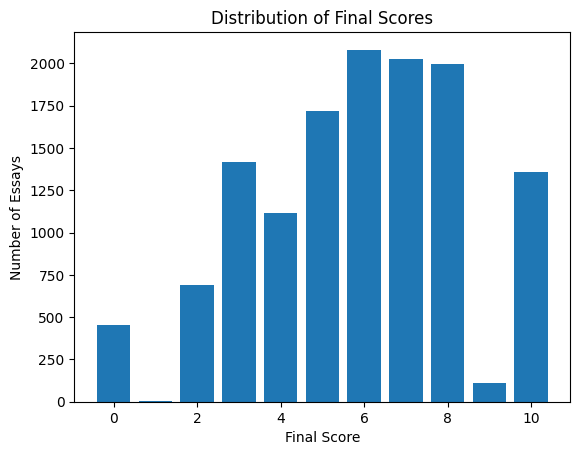

In [10]:
# Plot score distribution
score_counts = df['final_score'].value_counts()
plt.bar(score_counts.index, score_counts.values)
plt.xlabel('Final Score')
plt.ylabel('Number of Essays')
plt.title('Distribution of Final Scores')
plt.show()

## Taking DeBERTa-v3-base llm model for fine-tunning and prompt

In [11]:
model_name = 'microsoft/deberta-v3-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:562: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* DeBERTa v3 Base is a pre-trained language model that belongs to the DeBERTa family, developed by Microsoft. Here are some key details about the DeBERTa v3 Base model:

* Overview
Model Name: DeBERTa v3 Base
Architecture: Transformer-based with disentangled attention and ELECTRA-style pre-training.
Model Size: Base variant with around 140 million parameters.

* Applications
- DeBERTa v3 Base can be fine-tuned for a wide range of natural language processing (NLP) tasks:

- Text Classification: Sentiment analysis, spam detection, topic categorization.
- Named Entity Recognition (NER): Identifying entities like names, dates, locations in text.
- Question Answering: Extracting answers from passages of text given a question.
- Text Summarization: Generating concise summaries of longer documents.
- Language Translation: Assisting in machine translation tasks when used in multilingual contexts.

* Using DeBERTa v3 Base
- To use the DeBERTa v3 Base model, typically need to fine-tune it on a specific downstream task using a framework like Hugging Face's Transformers library.

### Function to generate prompt

In [12]:
def generate_prompt(example):
    return f"Score the following essay on a scale of 1 to 10:\n\n{example['clean_essay']}\n\nScore:"

In [13]:
df['prompt'] = df.apply(generate_prompt, axis=1)

In [14]:
## Generated Prompt
df['prompt']

0        Score the following essay on a scale of 1 to 1...
1        Score the following essay on a scale of 1 to 1...
2        Score the following essay on a scale of 1 to 1...
3        Score the following essay on a scale of 1 to 1...
4        Score the following essay on a scale of 1 to 1...
                               ...                        
12971    Score the following essay on a scale of 1 to 1...
12972    Score the following essay on a scale of 1 to 1...
12973    Score the following essay on a scale of 1 to 1...
12974    Score the following essay on a scale of 1 to 1...
12975    Score the following essay on a scale of 1 to 1...
Name: prompt, Length: 12976, dtype: object

## Converted DataFrame to Dataset

In [30]:
dataset = Dataset.from_pandas(df)

## Tokenizing the dataset for fine-tuning

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['prompt'], max_length=512, truncation=True, padding='max_length')

tokenized_dataset = dataset.map(tokenize_function, batched=True)

def add_labels(example):
    example['labels'] = float(example['final_score'])
    return example

tokenized_dataset = tokenized_dataset.map(add_labels, batched=False)

In [16]:
print(tokenized_dataset)

Dataset({
    features: ['Unnamed: 0', 'essay_id', 'essay_set', 'essay', 'final_score', 'clean_essay', 'char_count', 'word_count', 'sent_count', 'avg_word_len', 'spell_err_count', 'noun_count', 'adj_count', 'verb_count', 'adv_count', 'embeddings', 'prompt', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 12976
})


* A tokenizer is a crucial component in natural language processing (NLP) that converts text into smaller units called tokens. These tokens are typically words, subwords, or characters, which are then mapped to numerical representations that models can process. Tokenizers handle tasks such as:

* Splitting Text: Dividing the text into manageable units (tokens).
* Mapping Tokens to IDs: Assigning a unique numerical ID to each token.
* Handling Special Tokens: Managing special tokens like [CLS] (start of a sequence), [SEP] (separator between sequences), and [PAD] (padding).

### Split dataset

In [17]:
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
eval_dataset = train_test_split['test']

## Fine-tuning the model for essay Text dataset

* Fine-tuning the DeBERTa v3 base model on an essay text dataset involves adapting the pre-trained model to the specific characteristics of the essay texts. Here’s a high-level overview of the process:

* Dataset Preparation: Ensure the essay text dataset is pre-processed and embeddings are generated. This involves tokenizing the texts and converting them into the format suitable for DeBERTa.

* Model Loading: Load the DeBERTa v3 base model, which already has general language understanding capabilities from its pre-training phase.

* Fine-Tuning: Train the model on the essay dataset. This involves feeding the pre-processed texts into the model, calculating the loss (often using a task-specific head like classification or regression), and updating the model weights using backpropagation.

* Evaluation: After fine-tuning, evaluate the model on a validation set to ensure it has learned the nuances of the essay texts effectively.

* Inference: Use the fine-tuned model to generate embeddings or perform specific tasks like essay scoring or semantic analysis.

* Fine-tuning helps the model to better understand the context and intricacies of essay texts, leading to improved performance on tasks specific to this domain.

In [18]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=50,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


## Train the model

In [19]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,2.223000,2.044940


TrainOutput(global_step=1298, training_loss=3.4924022868528204, metrics={'train_runtime': 1558.0307, 'train_samples_per_second': 6.662, 'train_steps_per_second': 0.833, 'total_flos': 2731117212241920.0, 'train_loss': 3.4924022868528204, 'epoch': 1.0})

### Download model after fine-tuning

In [34]:
!zip -r ./results.zip ./results
from google.colab import files
files.download('./results.zip')

  adding: results/ (stored 0%)
  adding: results/checkpoint-1298/ (stored 0%)
  adding: results/checkpoint-1298/config.json (deflated 53%)
  adding: results/checkpoint-1298/training_args.bin (deflated 51%)
  adding: results/checkpoint-1298/trainer_state.json (deflated 68%)
  adding: results/checkpoint-1298/rng_state.pth (deflated 25%)
  adding: results/checkpoint-1298/optimizer.pt (deflated 48%)
  adding: results/checkpoint-1298/model.safetensors (deflated 19%)
  adding: results/checkpoint-1298/scheduler.pt (deflated 56%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
print(model)

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine

## Function to predict essay score on new Essay Text

In [20]:
def predict_essay_score_deberta(essay_text, model, tokenizer):
    prompt = f"Score the following essay on a scale of 1 to 10:\n\n{essay_text}\n\nScore:"
    inputs = tokenizer([prompt], max_length=512, return_tensors='pt', truncation=True)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    score = outputs.logits.squeeze().item()
    rounded_score = round(score)
    return rounded_score

* The provided code defines a function to predict an essay score using a DeBERTa model and then applies this function to a sample essay. Here’s a breakdown:

1. Prompt Creation:

- Constructs a prompt that asks for an essay score.
- Combines the essay text with instructions.

2. Tokenization:

- Uses the tokenizer to convert the prompt into input tensors suitable for the model.
- Limits the length to 512 tokens and ensures the input format is compatible with PyTorch (return_tensors='pt').

3. Input Preparation:

- Moves the tokenized inputs to the same device (CPU or GPU) as the model.

4. Model Inference:

- Disables gradient calculation (torch.no_grad()) to speed up inference and reduce memory usage.
- Passes the inputs through the model to get the output logits.

5. Score Extraction and Rounding:

- Extracts the predicted score from the model's output.
- Rounds the score to the nearest integer.

6. Return Value:

- Returns the rounded score.

## Using prompt to automate grading on new Essay Text

In [29]:
essay_text = "Dear @CAPS1, I know some problems have came up where some individuals do not agree with the benefits that computers provide us with. I am writing this to get my voice out, or how computers can only help us. Computers teach us hand eye coordination which is an essential skill for many new jobs is this day and age. Not only do computers teach this hands skill but they allow for us to learn of faraway places without actually going to that place and they allow is to talk and intersit with our friends, family and even! Computers are incredible in that they give us the chance to learn of a place where we can not go. Since the creation at the internet, studies have proven that our country's overall average intelect has increased by over @PERCENT1! @PERSON2 has a remark a this subject."" I am astranded that such a simple idea has turned out to be the largest virtual library has ever known!"" I could not help but to agree with him. Many people have learned of faraway places, reachable and unnexchable, in amazing detail just by viewing articals that the internet and computers offer. I have to admit that you have to sit down and read @CAPS2 which doesn't benefit you physically but it majorly benefits you mentally in a very minimum amount at time. Hand eye coordination is one of the most underectinated skills that computers provide. Technology is only going to advance, so why not get i over with and adapt to the new ways that things are being done by? Hand eye coordination is an essential skill in the jobs we have @DATE1. Someone who has expirienced hand eye coordination would tell you that the practice and the was with it because they can get papers and projects done faster, and more efficiently. A fast typer can make as much as @MONEY1 an hour when they first set hired! Only computers teach this skill and it is almost imposible to learn this skill from something else. A new advancement in technology allows as to interact with one friends, family, and over forieners! Besides the cheap monthly cost of the internet, most of @CAPS2 services are completely free! Instead of wasting minutes on your exposive cellular phone, you can just chat with your friends and family online for free. @CAPS2 free social services can even connect you with people in different countries, so you can learn about their lifestyle and culture as I did! @PERSON1 says, ""@CAPS2 advancements are remarkable and everybody should take advantage of @CAPS2 services."" I hope what I've said has an impact on you. Like I said before technology is only going to advance, so be love to adopt to it. Please take into consideration that computers train essential hand eye coordination, they allow us to pull articals of faraway places from a massive virtual library and they allow us to interact with our friends family, and people from all of life."
predicted_score = predict_essay_score_deberta(essay_text, model, tokenizer)
print(f'Predicted Score (DeBERTa Model): {predicted_score}')

Predicted Score (DeBERTa Model): 7


1. Essay Text:

- Contains a sample essay text with placeholders like @CAPS1 and @PERSON2, likely used for anonymization or data generation.

2. Score Prediction:
- Calls predict_essay_score_deberta with the essay text, model, and tokenizer.
Stores the predicted score in predicted_score.

3. Output:

- Prints the predicted score to the console.
- In summary, this code uses a DeBERTa model to predict a score for a given essay by tokenizing the essay text, feeding it to the model, and processing the output to get a rounded score.

## User - input based prompt essay text Grading

In [31]:
def main():
    essay_text = input("Please enter your essay text: ")
    predicted_score = predict_essay_score_deberta(essay_text, model, tokenizer)
    print(f'\nPredicted Score (DeBERTa Model): {predicted_score:}')

if __name__ == "__main__":
    main()

Please enter your essay text: "Dear @CAPS1, I know some problems have came up where some individuals do not agree with the benefits that computers provide us with. I am writing this to get my voice out, or how computers can only help us. Computers teach us hand eye coordination which is an essential skill for many new jobs is this day and age. Not only do computers teach this hands skill but they allow for us to learn of faraway places without actually going to that place and they allow is to talk and intersit with our friends, family and even! Computers are incredible in that they give us the chance to learn of a place where we can not go. Since the creation at the internet, studies have proven that our country's overall average intelect has increased by over @PERCENT1! @PERSON2 has a remark a this subject."" I am astranded that such a simple idea has turned out to be the largest virtual library has ever known!"" I could not help but to agree with him. Many people have learned of fara